In [2]:
import sys

import numpy as np
import pandas as pd

from MARS import runMARSForward, runMARSBackward

import logging
import pickle

from MARSModel import MARSModel

SSR = 143.51850657834743

df = pd.read_json('CCPP.json')
X = df[['AT', 'V', 'AP', 'RH']].to_numpy()
y = df['PE'].to_numpy()
X = np.array(list(map(np.array, X)))
X = X[:2500]
y = y[:2500]
labels = ['AT', 'V', 'AP', 'RH']

with open("modell.pickle", "rb") as infile:
    model = pickle.load(infile) 
    m = MARSModel()
    m.components = model
    old = m.copy()
    print(old)
    newmodel = runMARSBackward(m, SSR, X, y, 5, maxSplits=8)
    print(newmodel)


1.0 - 0.42799081762927841max(0,AT - 0.7780999185) + 0.91045018302501991max(0,0.7780999185 - AT) - 0.114985301478947121max(0,RH - -2.1896157102) - 0.211387486922982151max(0,-2.1896157102 - RH) + 0.16181624753239591max(0,V - 1.3876569689) + 0.191437499410094861max(0,1.3876569689 - V) - 0.0297532269966455131max(0,AP - 0.1836944864) - 0.160249192863287261max(0,0.1836944864 - AP) + 0.033945974550292591max(0,0.1836944864 - AP)max(0,V - -0.4914901095) + 0.224809228559466641max(0,0.1836944864 - AP)max(0,-0.4914901095 - V) 
1.0 - 0.0297532269966455131max(0,AP - 0.1836944864) - 0.160249192863287261max(0,0.1836944864 - AP) + 0.033945974550292591max(0,0.1836944864 - AP)max(0,V - -0.4914901095) + 0.224809228559466641max(0,0.1836944864 - AP)max(0,-0.4914901095 - V) 


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_result = pca.fit_transform(X)

df = pd.DataFrame()

df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]
df['y'] = y

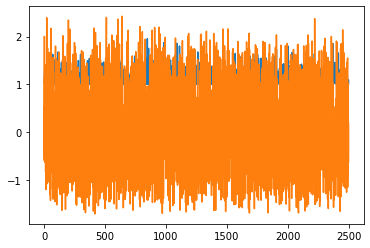

In [7]:
newmodelv = []
oldmodelv = []
for i in range(len(X)):
    obs = X[i]
    dic = {0: obs[0], 1: obs[1], 2: obs[2], 3: obs[3]}
    v = 0
    for c in newmodel.components:
        hinge_values = {v: dic[v] for v in c.func.getVariables()}
        v += c.eval(hinge_values)
    newmodelv.append(v)
    d = 0
    for c in old.components:
        hinge_values = {v: dic[v] for v in c.func.getVariables()}
        d += c.eval(hinge_values)
    oldmodelv.append(d)

plt.plot(newmodelv)